# Telemac3d exercise


We are going to work with the telemac3d test case source.git a

In [1]:
from data_manip.extraction.telemac_file import TelemacFile
from data_manip.computation.triangulation import\
                triangulation_from_data
from postel.plot2d import plot2d_vectors, plot2d_scalar_filled_contour
import matplotlib.pyplot as plt
import numpy as np
from os import path, environ

file_name = path.join(environ['HOMETEL'], 
                      'notebooks',
                      'workshop',
                      'data', 
                      'r3d_source.slf')

## Exo1

Plot the value of norm of the velocity in s scalar filled contour and on top of that plot the vectors.

For the third plane and record 5.

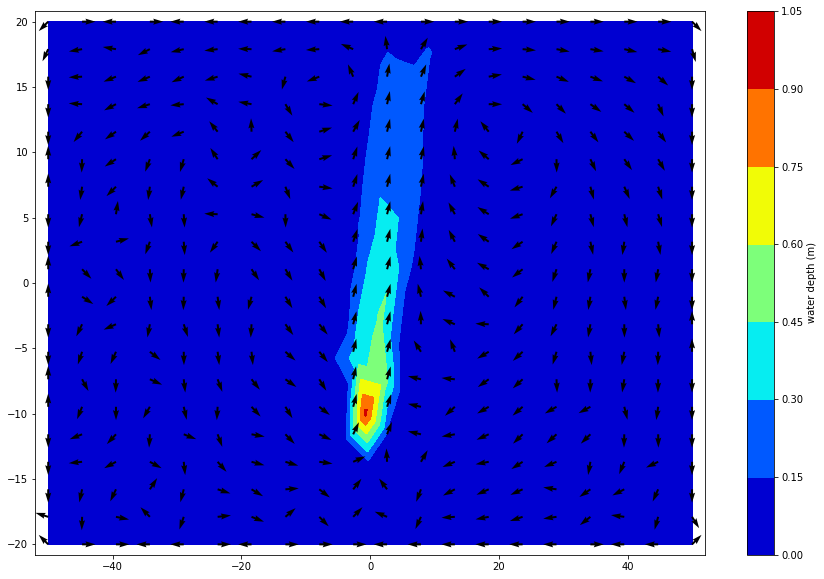

In [2]:
res = TelemacFile(file_name)

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

plane = 2
record = 5

vel_x = res.get_data_on_horizontal_plane(\
                'VELOCITY U', record, plane)
vel_y = res.get_data_on_horizontal_plane(\
                'VELOCITY V', record, plane)

vel = np.sqrt(vel_x**2 + vel_y**2)
        
plot2d_scalar_filled_contour(fig, ax, res.tri, 
                             vel, 
                             data_name='water depth (m)')

plot2d_vectors(\
                fig, ax,
                res.tri,
                vel_x,
                vel_y,
                grid_resolution=[20, 20],
                data_name='velocity',
                color='k')
plt.show()

del res

## Exo 2

Plot the valaue of the three tracer in the file at the last record for the first plane.

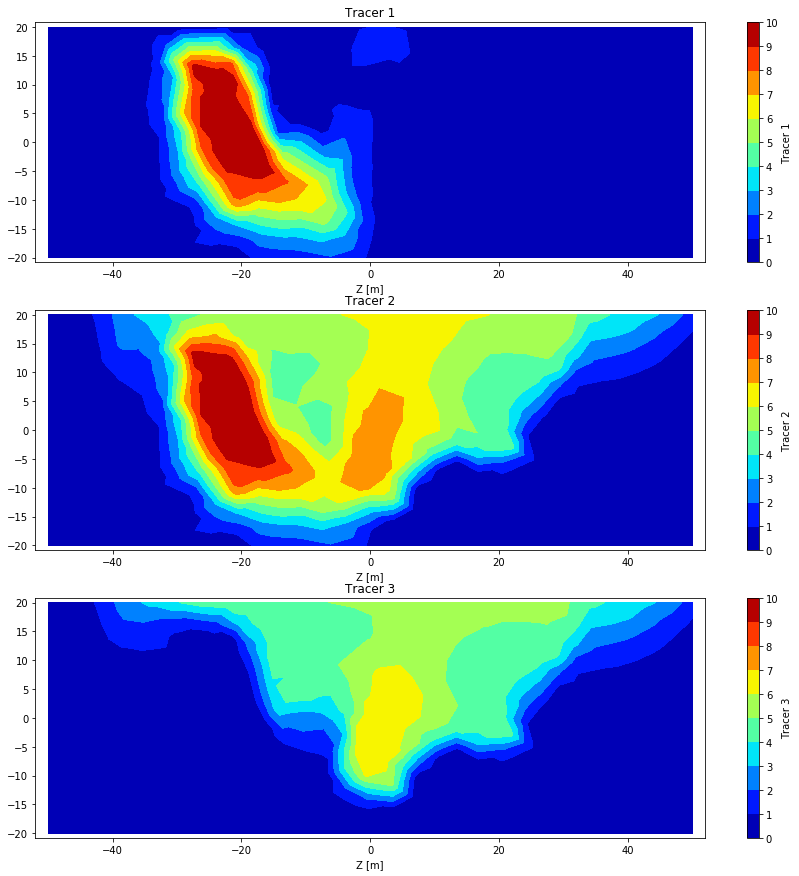

In [3]:
res = TelemacFile(file_name)

fig, ax = plt.subplots(3, 1, figsize=(15, 15))

plane = 0
record = -1

for tracer in range(1, 4):

     var_name = 'TRACER {}'.format(tracer)
     name = 'Tracer {}'.format(tracer)

     data = res.get_data_on_horizontal_plane(\
                         var_name, record, plane)

     plot2d_scalar_filled_contour(\
                    fig, ax[tracer-1], res.tri,
                    data.flatten(),
                    data_name=name,
                    levels=np.linspace(0, 10, 11),
                    colorbar=True)

     ax[tracer-1].set_title(name)
     ax[tracer-1].set_xlabel('X [m]')
     ax[tracer-1].set_xlabel('Z [m]')
         
plt.show()
plt.clf()

del res

## Exo3

In [4]:
poly = [[-50, 0], [50, 0]]

Plot a vertical slice for each tracer at the last record.

Discretize the polyline using TelemacFile function.

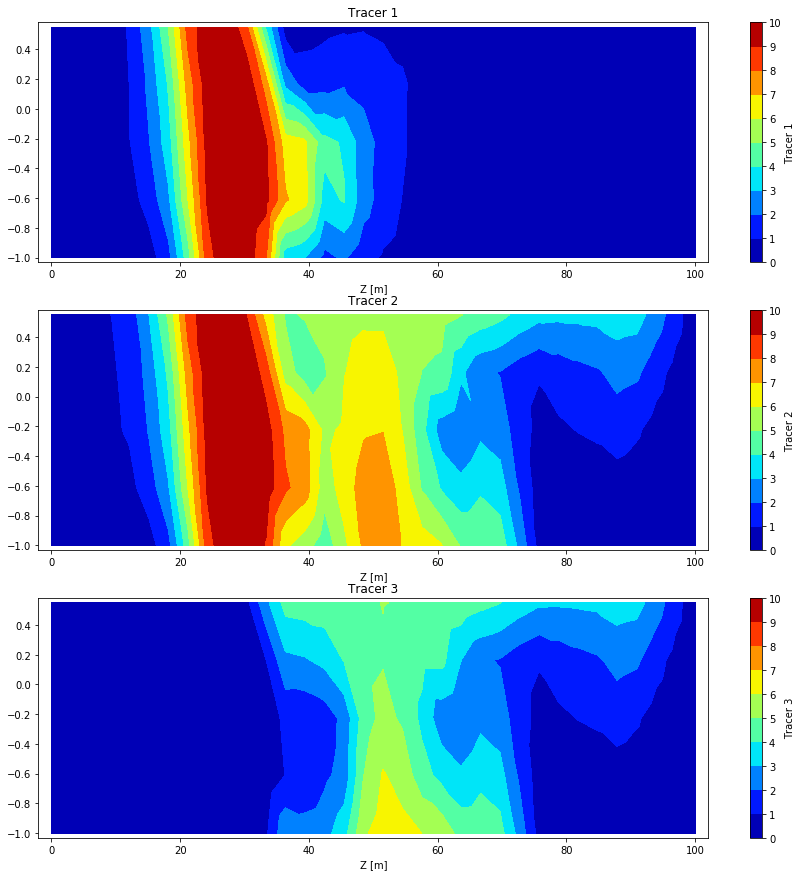

In [5]:
res = TelemacFile(file_name)

poly_number = res.discretize_polyline(poly)

fig, ax = plt.subplots(3, 1, figsize=(15, 15))

_, abs_curv, poly_z0 = res.get_data_on_vertical_plane(\
                                  'ELEVATION Z', -1, poly, poly_number)

mesh0 = triangulation_from_data(abs_curv, poly_z0)

for tracer in range(1, 4):

    var_name = 'TRACER {}'.format(tracer)
    name = 'Tracer {}'.format(tracer)

    _, _, data0 = res.get_data_on_vertical_plane(\
                               var_name, -1, poly,  poly_number)
    
    img = plot2d_scalar_filled_contour(\
                    fig, ax[tracer-1], mesh0,
                    data0.flatten(),
                    data_name=name,
                    levels=np.linspace(0, 10, 11))

    ax[tracer-1].set_title(name)
    ax[tracer-1].set_xlabel('X [m]')
    ax[tracer-1].set_xlabel('Z [m]')

plt.show()

del res